In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/march-machine-learning-mania-2024/Conferences.csv
/kaggle/input/march-machine-learning-mania-2024/sample_submission.csv
/kaggle/input/march-machine-learning-mania-2024/WNCAATourneyDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2024/WRegularSeasonCompactResults.csv
/kaggle/input/march-machine-learning-mania-2024/MNCAATourneySeedRoundSlots.csv
/kaggle/input/march-machine-learning-mania-2024/MRegularSeasonDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2024/MNCAATourneyCompactResults.csv
/kaggle/input/march-machine-learning-mania-2024/MGameCities.csv
/kaggle/input/march-machine-learning-mania-2024/WGameCities.csv
/kaggle/input/march-machine-learning-mania-2024/MSeasons.csv
/kaggle/input/march-machine-learning-mania-2024/WNCAATourneySlots.csv
/kaggle/input/march-machine-learning-mania-2024/MSecondaryTourneyTeams.csv
/kaggle/input/march-machine-learning-mania-2024/2024_tourney_seeds.csv
/kaggle/input/march-machine-learning-mania-2024/Cities.csv
/

In [2]:
# Data Section 1 - The Basics:
MTeams= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MTeams.csv')
WTeams= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WTeams.csv')

MSeasons= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MSeasons.csv')
WSeasons= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WSeasons.csv')

MNCAATourneySeeds= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MNCAATourneySeeds.csv')
WNCAATourneySeeds= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WNCAATourneySeeds.csv')

# Data Section 2 - Team Box Scores
MRegularSeasonCompactResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MRegularSeasonCompactResults.csv')
WRegularSeasonCompactResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WRegularSeasonCompactResults.csv')

MNCAATourneyCompactResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MNCAATourneyCompactResults.csv')
WNCAATourneyCompactResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WNCAATourneyCompactResults.csv')

MRegularSeasonDetailedResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MRegularSeasonDetailedResults.csv')
WRegularSeasonDetailedResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WRegularSeasonDetailedResults.csv')

MNCAATourneyDetailedResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MNCAATourneyDetailedResults.csv')
WNCAATourneyDetailedResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WNCAATourneyDetailedResults.csv')

# Data Section 3 - Geography
Cities= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/Cities.csv')

MGameCities= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MGameCities.csv')
WGameCities= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WGameCities.csv')

# Data Section 4 - Public Rankings
MMasseyOrdinals= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MMasseyOrdinals_thruSeason2024_day128.csv')

# Data Section 5 - Supplements
MTeamCoaches= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MTeamCoaches.csv')

Conferences= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/Conferences.csv')

MTeamConferences= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MTeamConferences.csv')
WTeamConferences= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WTeamConferences.csv')

MConferenceTourneyGames= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MConferenceTourneyGames.csv')

MSecondaryTourneyTeams= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MSecondaryTourneyTeams.csv')

MSecondaryTourneyCompactResults= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MSecondaryTourneyCompactResults.csv')

MTeamSpellings= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MTeamSpellings.csv', encoding='ISO-8859-1')
WTeamSpellings= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WTeamSpellings.csv', encoding='ISO-8859-1')

MNCAATourneySlots= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MNCAATourneySlots.csv')
WNCAATourneySlots= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WNCAATourneySlots.csv')  

MNCAATourneySeedRoundSlots= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MNCAATourneySeedRoundSlots.csv')

# Data Section 6 - Others
tourney_seeds_2024= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/2024_tourney_seeds.csv')
# fivethirtyeight_ncaa_forecasts_2023= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/fivethirtyeight_ncaa_forecasts_2023.csv')
sample_submission= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/sample_submission.csv')


In [3]:
#MEN
# Split data: one row per game becomes two rows
MNCAATourneyCompactResults_teams = pd.DataFrame(columns=["Season", "DayNum", "TeamID", "Score_T", "OpposingTeamID","Score_O", "Loc", "NumOT", "Outcome"])

for index, row in MNCAATourneyCompactResults.iterrows():
    # Extract match information
    season = row["Season"]
    day_num = row["DayNum"]
    w_team_id = row["WTeamID"]
    w_score = row["WScore"]
    l_team_id = row["LTeamID"]
    l_score = row["LScore"]
    w_loc = row["WLoc"]
    num_ot = row["NumOT"]

    # Add a row of data to represent the winning match results
    winning_match_row = pd.DataFrame({
        "Season": [season],
        "DayNum": [day_num],
        "TeamID": [w_team_id],
        "Score_T": [w_score],
        "Score_O": [l_score],
        "OpposingTeamID": [l_team_id],
        "Loc": [w_loc],
        "NumOT": [num_ot],
        "Outcome": ["Win"]
    })
    MNCAATourneyCompactResults_teams = pd.concat([MNCAATourneyCompactResults_teams, winning_match_row], ignore_index=True)

    # Add a row of data to represent the result of the losing game
    losing_match_row = pd.DataFrame({
        "Season": [season],
        "DayNum": [day_num],
        "TeamID": [l_team_id],
        "Score_T": [l_score],
        "Score_O": [w_score],
        "OpposingTeamID": [w_team_id],
        "Loc": ["H" if w_loc == "A" else "A" if w_loc == "H" else "N"],
        "NumOT": [num_ot],
        "Outcome": ["Loss"]
    })
    MNCAATourneyCompactResults_teams = pd.concat([MNCAATourneyCompactResults_teams, losing_match_row], ignore_index=True)
    
MNCAATourneyCompactResults_teams


,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome
0,1985,136,1116,63,1234,54,N,0,Win
1,1985,136,1234,54,1116,63,N,0,Loss
2,1985,136,1120,59,1345,58,N,0,Win
3,1985,136,1345,58,1120,59,N,0,Loss
4,1985,136,1207,68,1250,43,N,0,Win
...,...,...,...,...,...,...,...,...,...
4897,2023,152,1274,59,1163,72,N,0,Loss
4898,2023,152,1361,72,1194,71,N,0,Win
4899,2023,152,1194,71,1361,72,N,0,Loss
4900,2023,154,1163,76,1361,59,N,0,Win


In [4]:
#WOMEN
# Split data: one row per game becomes two rows
WNCAATourneyCompactResults_teams = pd.DataFrame(columns=["Season", "DayNum", "TeamID", "Score_T", "OpposingTeamID","Score_O", "Loc", "NumOT", "Outcome"])

for index, row in WNCAATourneyCompactResults.iterrows():
    # Extract match information
    season = row["Season"]
    day_num = row["DayNum"]
    w_team_id = row["WTeamID"]
    w_score = row["WScore"]
    l_team_id = row["LTeamID"]
    l_score = row["LScore"]
    w_loc = row["WLoc"]
    num_ot = row["NumOT"]

    # Add a row of data to represent the winning match results
    winning_match_row = pd.DataFrame({
        "Season": [season],
        "DayNum": [day_num],
        "TeamID": [w_team_id],
        "Score_T": [w_score],
        "Score_O": [l_score],
        "OpposingTeamID": [l_team_id],
        "Loc": [w_loc],
        "NumOT": [num_ot],
        "Outcome": ["Win"]
    })
    WNCAATourneyCompactResults_teams = pd.concat([WNCAATourneyCompactResults_teams, winning_match_row], ignore_index=True)

    # Add a row of data to represent the result of the losing game
    losing_match_row = pd.DataFrame({
        "Season": [season],
        "DayNum": [day_num],
        "TeamID": [l_team_id],
        "Score_T": [l_score],
        "Score_O": [w_score],
        "OpposingTeamID": [w_team_id],
        "Loc": ["H" if w_loc == "A" else "A" if w_loc == "H" else "N"],
        "NumOT": [num_ot],
        "Outcome": ["Loss"]
    })
    WNCAATourneyCompactResults_teams = pd.concat([WNCAATourneyCompactResults_teams, losing_match_row], ignore_index=True)
    
WNCAATourneyCompactResults_teams

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome
0,1998,137,3104,94,3422,46,H,0,Win
1,1998,137,3422,46,3104,94,A,0,Loss
2,1998,137,3112,75,3365,63,H,0,Win
3,1998,137,3365,63,3112,75,A,0,Loss
4,1998,137,3163,93,3193,52,H,0,Win
...,...,...,...,...,...,...,...,...,...
3161,2023,151,3376,73,3234,77,N,0,Loss
3162,2023,151,3261,79,3439,72,N,0,Win
3163,2023,151,3439,72,3261,79,N,0,Loss
3164,2023,153,3261,102,3234,85,N,0,Win


In [5]:
#MEN
MNCAATourneyCompactResults_teamseed = pd.merge(MNCAATourneyCompactResults_teams, MNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','TeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'Seed_T'})
MNCAATourneyCompactResults_teamseed

MNCAATourneyCompactResults_teamseeds = pd.merge(MNCAATourneyCompactResults_teamseed, MNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','OpposingTeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'Seed_O','TeamID_x':'TeamID'})
MNCAATourneyCompactResults_teamseeds.drop(columns=['TeamID_y'], inplace=True)
MNCAATourneyCompactResults_teamseeds

MNCAATourneyCompactResults_teamseeds['Rank_T'] = MNCAATourneyCompactResults_teamseeds['Seed_T'].str[1:3].astype(int)
MNCAATourneyCompactResults_teamseeds['Rank_O'] = MNCAATourneyCompactResults_teamseeds['Seed_O'].str[1:3].astype(int)

MNCAATourneyCompactResults_teamseeds['RankDiff'] = MNCAATourneyCompactResults_teamseeds['Rank_O'] - MNCAATourneyCompactResults_teamseeds['Rank_T']
MNCAATourneyCompactResults_teamseeds['ScoreDiff'] = MNCAATourneyCompactResults_teamseeds['Score_O'] - MNCAATourneyCompactResults_teamseeds['Score_T']


MNCAATourneyCompactResults_teamseeds.head()

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff
0,1985,136,1116,63,1234,54,N,0,Win,X09,X08,9,8,-1,-9
1,1985,136,1234,54,1116,63,N,0,Loss,X08,X09,8,9,1,9
2,1985,136,1120,59,1345,58,N,0,Win,Z11,Z06,11,6,-5,-1
3,1985,136,1345,58,1120,59,N,0,Loss,Z06,Z11,6,11,5,1
4,1985,136,1207,68,1250,43,N,0,Win,W01,W16,1,16,15,-25


In [6]:
team_ids = MNCAATourneyCompactResults_teamseeds['TeamID'].unique().tolist()
team_ids
team_info_list = []
for team_id in team_ids:
    team_data = MNCAATourneyCompactResults_teamseeds[MNCAATourneyCompactResults_teamseeds['TeamID'] == team_id].iloc[0]  # 选择每个团队的第一个条目
    team_info_list.append({'TeamID': team_id,
                           '1stD1Season': team_data['Season']})
team_1stD1Season_M = pd.DataFrame(team_info_list)
team_1stD1Season_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   TeamID       306 non-null    int64
 1   1stD1Season  306 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [7]:
MNCAATourneyCompactResults_merge = pd.merge(MNCAATourneyCompactResults_teamseeds, team_1stD1Season_M[['TeamID','1stD1Season']], left_on=['TeamID'], right_on=['TeamID'], how='left').rename(columns={'1stD1Season':'1stD1Season_T'})
MNCAATourneyCompactResults_merge = pd.merge(MNCAATourneyCompactResults_merge, team_1stD1Season_M[['TeamID','1stD1Season']], left_on=['OpposingTeamID'], right_on=['TeamID'], how='left').rename(columns={'1stD1Season':'1stD1Season_O','TeamID_x':'TeamID'})
MNCAATourneyCompactResults_merge.drop(columns=['TeamID_y'], inplace=True)
MNCAATourneyCompactResults_merge.head()

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff,1stD1Season_T,1stD1Season_O
0,1985,136,1116,63,1234,54,N,0,Win,X09,X08,9,8,-1,-9,1985,1985
1,1985,136,1234,54,1116,63,N,0,Loss,X08,X09,8,9,1,9,1985,1985
2,1985,136,1120,59,1345,58,N,0,Win,Z11,Z06,11,6,-5,-1,1985,1985
3,1985,136,1345,58,1120,59,N,0,Loss,Z06,Z11,6,11,5,1,1985,1985
4,1985,136,1207,68,1250,43,N,0,Win,W01,W16,1,16,15,-25,1985,1985


In [8]:
#WOMEN
WNCAATourneyCompactResults_teamseed = pd.merge(WNCAATourneyCompactResults_teams, WNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','TeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'Seed_T'})
WNCAATourneyCompactResults_teamseeds = pd.merge(WNCAATourneyCompactResults_teamseed, WNCAATourneySeeds[['Season','TeamID','Seed']], left_on=['Season','OpposingTeamID'], right_on=['Season','TeamID'], how='left').rename(columns={'Seed':'Seed_O','TeamID_x':'TeamID'})
WNCAATourneyCompactResults_teamseeds.drop(columns=['TeamID_y'], inplace=True)

WNCAATourneyCompactResults_teamseeds['Rank_T'] = WNCAATourneyCompactResults_teamseeds['Seed_T'].str[1:3].astype(int)
WNCAATourneyCompactResults_teamseeds['Rank_O'] = WNCAATourneyCompactResults_teamseeds['Seed_O'].str[1:3].astype(int)

WNCAATourneyCompactResults_teamseeds['RankDiff'] = WNCAATourneyCompactResults_teamseeds['Rank_O'] - WNCAATourneyCompactResults_teamseeds['Rank_T']
WNCAATourneyCompactResults_teamseeds['ScoreDiff'] = MNCAATourneyCompactResults_teamseeds['Score_O'] - MNCAATourneyCompactResults_teamseeds['Score_T']

WNCAATourneyCompactResults_teamseeds.head()

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff
0,1998,137,3104,94,3422,46,H,0,Win,X02,X15,2,15,13,-9
1,1998,137,3422,46,3104,94,A,0,Loss,X15,X02,15,2,-13,9
2,1998,137,3112,75,3365,63,H,0,Win,W03,W14,3,14,11,-1
3,1998,137,3365,63,3112,75,A,0,Loss,W14,W03,14,3,-11,1
4,1998,137,3163,93,3193,52,H,0,Win,W02,W15,2,15,13,-25


In [9]:
team_ids = WNCAATourneyCompactResults_teamseeds['TeamID'].unique().tolist()
team_info_list = []
for team_id in team_ids:
    team_data = WNCAATourneyCompactResults_teamseeds[WNCAATourneyCompactResults_teamseeds['TeamID'] == team_id].iloc[0]  # 选择每个团队的第一个条目
    team_info_list.append({'TeamID': team_id,
                           '1stD1Season': team_data['Season']})
team_1stD1Season_W = pd.DataFrame(team_info_list)
WNCAATourneyCompactResults_merge = pd.merge(WNCAATourneyCompactResults_teamseeds, team_1stD1Season_W[['TeamID','1stD1Season']], left_on=['TeamID'], right_on=['TeamID'], how='left').rename(columns={'1stD1Season':'1stD1Season_T'})
WNCAATourneyCompactResults_merge = pd.merge(WNCAATourneyCompactResults_merge, team_1stD1Season_W[['TeamID','1stD1Season']], left_on=['OpposingTeamID'], right_on=['TeamID'], how='left').rename(columns={'1stD1Season':'1stD1Season_O','TeamID_x':'TeamID'})
WNCAATourneyCompactResults_merge.drop(columns=['TeamID_y'], inplace=True)
WNCAATourneyCompactResults_merge.head()

,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff,1stD1Season_T,1stD1Season_O
0,1998,137,3104,94,3422,46,H,0,Win,X02,X15,2,15,13,-9,1998,1998
1,1998,137,3422,46,3104,94,A,0,Loss,X15,X02,15,2,-13,9,1998,1998
2,1998,137,3112,75,3365,63,H,0,Win,W03,W14,3,14,11,-1,1998,1998
3,1998,137,3365,63,3112,75,A,0,Loss,W14,W03,14,3,-11,1,1998,1998
4,1998,137,3163,93,3193,52,H,0,Win,W02,W15,2,15,13,-25,1998,1998


In [10]:
MNCAATourneyCompactResults_teams = MNCAATourneyCompactResults_merge[(MNCAATourneyCompactResults_merge['Season']>=2010) & (MNCAATourneyCompactResults_merge['Season']<2024)]
MNCAATourneyCompactResults_teams.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          1734 non-null   object
 1   DayNum          1734 non-null   object
 2   TeamID          1734 non-null   object
 3   Score_T         1734 non-null   object
 4   OpposingTeamID  1734 non-null   object
 5   Score_O         1734 non-null   object
 6   Loc             1734 non-null   object
 7   NumOT           1734 non-null   object
 8   Outcome         1734 non-null   object
 9   Seed_T          1734 non-null   object
 10  Seed_O          1734 non-null   object
 11  Rank_T          1734 non-null   int64 
 12  Rank_O          1734 non-null   int64 
 13  RankDiff        1734 non-null   int64 
 14  ScoreDiff       1734 non-null   object
 15  1stD1Season_T   1734 non-null   int64 
 16  1stD1Season_O   1734 non-null   int64 
dtypes: int64(5), object(12)
memory usage: 230.4+ KB


In [11]:
WNCAATourneyCompactResults_teams = WNCAATourneyCompactResults_merge[(WNCAATourneyCompactResults_merge['Season']>=2010) & (WNCAATourneyCompactResults_merge['Season']<2024)]
WNCAATourneyCompactResults_teams.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          1654 non-null   object
 1   DayNum          1654 non-null   object
 2   TeamID          1654 non-null   object
 3   Score_T         1654 non-null   object
 4   OpposingTeamID  1654 non-null   object
 5   Score_O         1654 non-null   object
 6   Loc             1654 non-null   object
 7   NumOT           1654 non-null   object
 8   Outcome         1654 non-null   object
 9   Seed_T          1654 non-null   object
 10  Seed_O          1654 non-null   object
 11  Rank_T          1654 non-null   int64 
 12  Rank_O          1654 non-null   int64 
 13  RankDiff        1654 non-null   int64 
 14  ScoreDiff       1654 non-null   object
 15  1stD1Season_T   1654 non-null   int64 
 16  1stD1Season_O   1654 non-null   int64 
dtypes: int64(5), object(12)
memory usage: 219.8+ KB


In [12]:
#MEN
Mdf_Loc = MNCAATourneyCompactResults_teams.copy()
Mdf_Loc['Loc'] = Mdf_Loc['Loc'].replace({'H': 1, 'A': -1, 'N': 0})
Mdf_Loc.reset_index(drop=True).head()
#WOMEN
Wdf_Loc = WNCAATourneyCompactResults_teams.copy()
Wdf_Loc['Loc'] = Wdf_Loc['Loc'].replace({'H': 1, 'A': -1, 'N': 0})
Wdf_Loc.reset_index(drop=True).head()

/tmp/ipykernel_18/3716682691.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Mdf_Loc['Loc'] = Mdf_Loc['Loc'].replace({'H': 1, 'A': -1, 'N': 0})
/tmp/ipykernel_18/3716682691.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Wdf_Loc['Loc'] = Wdf_Loc['Loc'].replace({'H': 1, 'A': -1, 'N': 0})


,Season,DayNum,TeamID,Score_T,OpposingTeamID,Score_O,Loc,NumOT,Outcome,Seed_T,Seed_O,Rank_T,Rank_O,RankDiff,ScoreDiff,1stD1Season_T,1stD1Season_O
0,2010,138,3124,69,3201,55,0,0,Win,X04,X13,4,13,9,-8,2001,2008
1,2010,138,3201,55,3124,69,0,0,Loss,X13,X04,13,4,-9,8,2008,2001
2,2010,138,3173,67,3395,66,0,0,Win,X08,X09,8,9,1,-7,2010,2001
3,2010,138,3395,66,3173,67,0,0,Loss,X09,X08,9,8,-1,7,2001,2010
4,2010,138,3181,72,3214,37,1,0,Win,X02,X15,2,15,13,-3,1998,2000


In [13]:
df_WinAccount = MNCAATourneyCompactResults_teams.copy()

# Calculate the number of wins for each Team in history March Madness dataset
win_counts = df_WinAccount[df_WinAccount['Outcome'] == 'Win']['TeamID'].value_counts()

#Create a dictionary to map TeamID to the corresponding number of wins. If there is no win, the default is 0
win_counts_dict = dict(win_counts)
for team_id in df_WinAccount['TeamID'].unique():
    if team_id not in win_counts_dict:
        win_counts_dict[team_id] = 0

# Add 'WinAccount' column
df_WinAccount['WinAccount'] = df_WinAccount['TeamID'].map(win_counts_dict)
df_WinAccount['WinAccount'] = df_WinAccount['WinAccount'].fillna(0)

# Winning Rate in March Madness
# Calculate the number of times each team has participated in the game
team_appearances = df_WinAccount['TeamID'].value_counts() 

# Add the number of attendances for each game to the raw data
df_WinAccount['CompactAccount'] = df_WinAccount['TeamID'].map(team_appearances)
# Calculate each team's winning percentage when playing in March Madness
df_WinAccount['WinningRate'] = df_WinAccount['WinAccount']/df_WinAccount['CompactAccount']
df_WinAccount = df_WinAccount[['Season','DayNum','TeamID','CompactAccount','WinAccount','WinningRate']]
df_WinAccount.reset_index(drop=True).head()

,Season,DayNum,TeamID,CompactAccount,WinAccount,WinningRate
0,2010,134,1115,2,1,0.500000
1,2010,134,1457,3,0,0.000000
2,2010,136,1124,28,19,0.678571
3,2010,136,1358,1,0,0.000000
4,2010,136,1139,23,16,0.695652


In [14]:
#MEN
df_merge_M = pd.merge(Mdf_Loc,df_WinAccount[['Season','DayNum','TeamID',
                                             'CompactAccount','WinAccount','WinningRate'
                                            ]],left_on=['Season','DayNum','TeamID'],
                      right_on=['Season','DayNum','TeamID'],how='left')
df_merge_M = df_merge_M.rename(columns={'CompactAccount':'CompactAccount_T',
                                        'WinAccount':'WinAccount_T',
                                        'WinningRate':'WinningRate_T',
                                        'OpposingTeamID':'TeamID_O'
                                       })
df_merge_M = pd.merge(df_merge_M,df_WinAccount[['Season','DayNum','TeamID',
                                             'CompactAccount','WinAccount','WinningRate'
                                            ]],left_on=['Season','DayNum','TeamID_O'],
                      right_on=['Season','DayNum','TeamID'],how='left')
df_merge_M.drop(columns=['TeamID_y'], inplace=True)
df_merge_M = df_merge_M.rename(columns={'CompactAccount':'CompactAccount_O',
                                        'WinAccount':'WinAccount_O',
                                        'WinningRate':'WinningRate_O',
                                        'TeamID_x':'TeamID_T'
                                       })

df_merge_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1734 non-null   object 
 1   DayNum            1734 non-null   object 
 2   TeamID_T          1734 non-null   object 
 3   Score_T           1734 non-null   object 
 4   TeamID_O          1734 non-null   object 
 5   Score_O           1734 non-null   object 
 6   Loc               1734 non-null   int64  
 7   NumOT             1734 non-null   object 
 8   Outcome           1734 non-null   object 
 9   Seed_T            1734 non-null   object 
 10  Seed_O            1734 non-null   object 
 11  Rank_T            1734 non-null   int64  
 12  Rank_O            1734 non-null   int64  
 13  RankDiff          1734 non-null   int64  
 14  ScoreDiff         1734 non-null   object 
 15  1stD1Season_T     1734 non-null   int64  
 16  1stD1Season_O     1734 non-null   int64  


In [15]:
#WOMEN
Wdf_WinAccount = WNCAATourneyCompactResults_teams.copy()

# Calculate the number of wins for each Team in history March Madness dataset
Wwin_counts = Wdf_WinAccount[Wdf_WinAccount['Outcome'] == 'Win']['TeamID'].value_counts()

#Create a dictionary to map TeamID to the corresponding number of wins. If there is no win, the default is 0
win_counts_dict = dict(Wwin_counts)
for team_id in Wdf_WinAccount['TeamID'].unique():
    if team_id not in win_counts_dict:
        win_counts_dict[team_id] = 0

# Add 'WinAccount' column
Wdf_WinAccount['WinAccount'] = Wdf_WinAccount['TeamID'].map(win_counts_dict)
Wdf_WinAccount['WinAccount'] = Wdf_WinAccount['WinAccount'].fillna(0)

# Winning Rate in March Madness
# Calculate the number of times each team has participated in the game
Wteam_appearances = Wdf_WinAccount['TeamID'].value_counts() 

# Add the number of attendances for each game to the raw data
Wdf_WinAccount['CompactAccount'] = Wdf_WinAccount['TeamID'].map(Wteam_appearances)
# Calculate each team's winning percentage when playing in March Madness
Wdf_WinAccount['WinningRate'] = Wdf_WinAccount['WinAccount']/Wdf_WinAccount['CompactAccount']
Wdf_WinAccount = Wdf_WinAccount[['Season','DayNum','TeamID','CompactAccount','WinAccount','WinningRate']]
Wdf_WinAccount.reset_index(drop=True).head()

,Season,DayNum,TeamID,CompactAccount,WinAccount,WinningRate
0,2010,138,3124,51,40,0.784314
1,2010,138,3201,5,0,0.000000
2,2010,138,3173,15,6,0.400000
3,2010,138,3395,1,0,0.000000
4,2010,138,3181,28,19,0.678571


In [16]:
df_merge_W = pd.merge(Wdf_Loc,Wdf_WinAccount[['Season','DayNum','TeamID',
                                             'CompactAccount','WinAccount','WinningRate'
                                            ]],left_on=['Season','DayNum','TeamID'],
                      right_on=['Season','DayNum','TeamID'],how='left')
df_merge_W = df_merge_W.rename(columns={'CompactAccount':'CompactAccount_T',
                                        'WinAccount':'WinAccount_T',
                                        'WinningRate':'WinningRate_T',
                                        'OpposingTeamID':'TeamID_O'
                                       })
df_merge_W = pd.merge(df_merge_W,Wdf_WinAccount[['Season','DayNum','TeamID',
                                             'CompactAccount','WinAccount','WinningRate'
                                            ]],left_on=['Season','DayNum','TeamID_O'],
                      right_on=['Season','DayNum','TeamID'],how='left')
df_merge_W.drop(columns=['TeamID_y'], inplace=True)
df_merge_W = df_merge_W.rename(columns={'CompactAccount':'CompactAccount_O',
                                        'WinAccount':'WinAccount_O',
                                        'WinningRate':'WinningRate_O',
                                        'TeamID_x':'TeamID_T'
                                       })

df_merge_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1654 non-null   object 
 1   DayNum            1654 non-null   object 
 2   TeamID_T          1654 non-null   object 
 3   Score_T           1654 non-null   object 
 4   TeamID_O          1654 non-null   object 
 5   Score_O           1654 non-null   object 
 6   Loc               1654 non-null   int64  
 7   NumOT             1654 non-null   object 
 8   Outcome           1654 non-null   object 
 9   Seed_T            1654 non-null   object 
 10  Seed_O            1654 non-null   object 
 11  Rank_T            1654 non-null   int64  
 12  Rank_O            1654 non-null   int64  
 13  RankDiff          1654 non-null   int64  
 14  ScoreDiff         1654 non-null   object 
 15  1stD1Season_T     1654 non-null   int64  
 16  1stD1Season_O     1654 non-null   int64  


In [17]:
#MEN
df_WandL_M = df_merge_M.copy()
df_WandL_M['Outcome'] = df_merge_M['Outcome'].map({'Win': 1, 'Loss': 0})
df_WandL_M.head()
features_M = ['Season',  'TeamID_T', 'TeamID_O', 
               'Rank_T', 'Rank_O', '1stD1Season_T','1stD1Season_O',
              'CompactAccount_T', 'WinAccount_T', 'WinningRate_T',
               'CompactAccount_O', 'WinAccount_O', 'WinningRate_O']
# Select target variable
Target_M = 'Outcome'
df_data_M = df_WandL_M[features_M + [Target_M]]
df_data_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1734 non-null   object 
 1   TeamID_T          1734 non-null   object 
 2   TeamID_O          1734 non-null   object 
 3   Rank_T            1734 non-null   int64  
 4   Rank_O            1734 non-null   int64  
 5   1stD1Season_T     1734 non-null   int64  
 6   1stD1Season_O     1734 non-null   int64  
 7   CompactAccount_T  1734 non-null   int64  
 8   WinAccount_T      1734 non-null   int64  
 9   WinningRate_T     1734 non-null   float64
 10  CompactAccount_O  1734 non-null   int64  
 11  WinAccount_O      1734 non-null   int64  
 12  WinningRate_O     1734 non-null   float64
 13  Outcome           1734 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 189.8+ KB


In [18]:
#WOMEN
Wdf_WandL = df_merge_W.copy()
Wdf_WandL['Outcome'] = df_merge_W['Outcome'].map({'Win': 1, 'Loss': 0})
Wdf_WandL
# Select and prepare features
features_W = ['Season',  'TeamID_T', 'TeamID_O', 
               'Rank_T', 'Rank_O', '1stD1Season_T','1stD1Season_O',
              'CompactAccount_T', 'WinAccount_T', 'WinningRate_T',
               'CompactAccount_O', 'WinAccount_O', 'WinningRate_O']
# Select target variable
Target_W = 'Outcome'
df_data_W = Wdf_WandL[features_W + [Target_W]]
df_data_W.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            1654 non-null   object 
 1   TeamID_T          1654 non-null   object 
 2   TeamID_O          1654 non-null   object 
 3   Rank_T            1654 non-null   int64  
 4   Rank_O            1654 non-null   int64  
 5   1stD1Season_T     1654 non-null   int64  
 6   1stD1Season_O     1654 non-null   int64  
 7   CompactAccount_T  1654 non-null   int64  
 8   WinAccount_T      1654 non-null   int64  
 9   WinningRate_T     1654 non-null   float64
 10  CompactAccount_O  1654 non-null   int64  
 11  WinAccount_O      1654 non-null   int64  
 12  WinningRate_O     1654 non-null   float64
 13  Outcome           1654 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 181.0+ KB


In [19]:
#MEN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training, validation, and testing sets
train_data = df_data_M[( df_data_M['Season'] <= 2020)]
val_data = df_data_M[(df_data_M['Season'] > 2020) & (df_data_M['Season'] <= 2023)]
# df_test = df_data_M[df_data_M['Season'] == 2023]

# Reset indices after splitting
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
# df_test.reset_index(drop=True, inplace=True)

# Separate into features (X) and target variable (y) for each set
X_train_df = train_data[features_M]
y_train_df = train_data[Target_M]

X_val_df = val_data[features_M]
y_val_df = val_data[Target_M]

# Display the shapes of the datasets
print("Training set shape:", X_train_df.shape)
print("Validation set shape:", X_val_df.shape)

Training set shape: (1334, 13)
Validation set shape: (400, 13)


In [20]:
#WOMEN
# Split the dataset into training, validation, and testing sets
Wtrain_data = df_data_W[( df_data_W['Season'] <= 2020)]
Wval_data = df_data_W[(df_data_W['Season'] > 2020) & (df_data_W['Season'] <= 2023)]
# Wdf_test = df_data_W[df_data_W['Season'] == 2023]

# Reset indices after splitting
Wtrain_data.reset_index(drop=True, inplace=True)
Wval_data.reset_index(drop=True, inplace=True)
# Wdf_test.reset_index(drop=True, inplace=True)

# Separate into features (X) and target variable (y) for each set
X_train_Wdf = Wtrain_data[features_W]
y_train_Wdf = Wtrain_data[Target_W]

X_val_Wdf = Wval_data[features_W]
y_val_Wdf = Wval_data[Target_W]

# Display the shapes of the datasets
print("Training set shape:", X_train_Wdf.shape)
print("Validation set shape:", X_val_Wdf.shape)

Training set shape: (1260, 13)
Validation set shape: (394, 13)


Linear Regression:

Men's data logistic regression accuracy: 0.7400
Confusion Matrix:
 [[148  52]
 [ 52 148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       200
           1       0.74      0.74      0.74       200

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400

Cross-Validation Accuracy Scores: [0.79827089 0.7925072  0.80403458 0.73487032 0.75144509]
Mean CV Accuracy: 0.7762


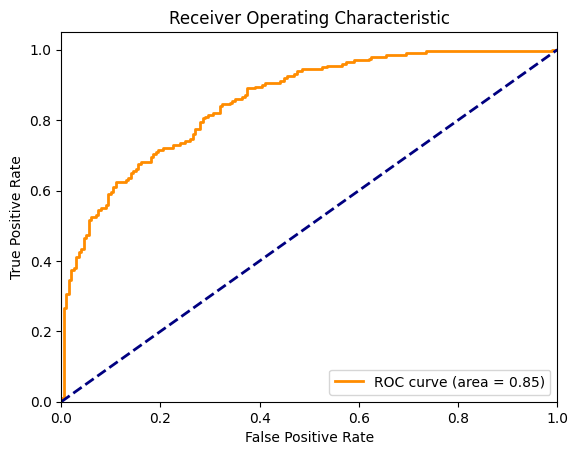

In [21]:
# MEN
# Assuming X_train_df and y_train_df are defined and preprocessed
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import numpy as np

# Initialize the scaler
scaler = StandardScaler()

# Scale features
X_train_scaled = scaler.fit_transform(X_train_df)
X_val_scaled = scaler.transform(X_val_df)

# Fit the logistic regression model
model_men = LogisticRegression(max_iter=1000)
model_men.fit(X_train_scaled, y_train_df)

# Predict on the validation set
predictions_men = model_men.predict(X_val_scaled)

# Evaluate the model
accuracy_men = accuracy_score(y_val_df, predictions_men)
print(f"Men's data logistic regression accuracy: {accuracy_men:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val_df, predictions_men)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_val_df, predictions_men)
print("Classification Report:\n", class_report)

# Corrected Cross-Validation using entire dataset
# Scale the entire dataset
df_data_M_scaled = scaler.fit_transform(df_data_M[features_M] )  
cv_accuracy = cross_val_score(model_men, df_data_M_scaled, df_data_M['Outcome'], cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_accuracy}")
print(f"Mean CV Accuracy: {cv_accuracy.mean():.4f}")

# ROC Curve and AUC
y_val_probs = model_men.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val_df, y_val_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Women's data logistic regression accuracy: 0.8223
Confusion Matrix:
 [[162  35]
 [ 35 162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       197
           1       0.82      0.82      0.82       197

    accuracy                           0.82       394
   macro avg       0.82      0.82      0.82       394
weighted avg       0.82      0.82      0.82       394

Cross-Validation Accuracy Scores (Women): [0.81268882 0.86102719 0.78851964 0.83685801 0.80606061]
Mean CV Accuracy (Women): 0.8210


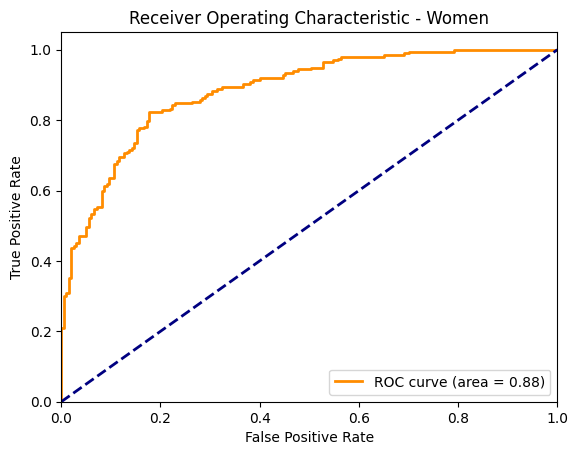

In [22]:
# WOMEN
# Initialize the scaler
scaler = StandardScaler()

# Scale features
X_train_W_scaled = scaler.fit_transform(X_train_Wdf)
X_val_W_scaled = scaler.transform(X_val_Wdf)

# Fit the logistic regression model
model_women = LogisticRegression(max_iter=1000)
model_women.fit(X_train_W_scaled, y_train_Wdf)

# Predict on the validation set
predictions_women = model_women.predict(X_val_W_scaled)

# Evaluate the model
accuracy_women = accuracy_score(y_val_Wdf, predictions_women)
print(f"Women's data logistic regression accuracy: {accuracy_women:.4f}")

# Confusion Matrix
conf_matrix_w = confusion_matrix(y_val_Wdf, predictions_women)
print("Confusion Matrix:\n", conf_matrix_w)

# Classification Report
class_report_w = classification_report(y_val_Wdf, predictions_women)
print("Classification Report:\n", class_report_w)

# Cross-Validation using entire dataset
# Scale the entire dataset
df_data_W_scaled = scaler.fit_transform(df_data_W[features_W])  
cv_accuracy_w = cross_val_score(model_women, df_data_W_scaled, df_data_W['Outcome'], cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores (Women): {cv_accuracy_w}")
print(f"Mean CV Accuracy (Women): {cv_accuracy_w.mean():.4f}")

# ROC Curve and AUC for Women
y_val_probs_w = model_women.predict_proba(X_val_W_scaled)[:, 1]
fpr_w, tpr_w, thresholds_w = roc_curve(y_val_Wdf, y_val_probs_w)
roc_auc_w = auc(fpr_w, tpr_w)

plt.figure()
plt.plot(fpr_w, tpr_w, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_w:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Women')
plt.legend(loc="lower right")
plt.show()

Random Forest

Men's data Random Forest accuracy: 0.7500
Confusion Matrix (Men):
 [[152  48]
 [ 52 148]]
Classification Report (Men):
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       200
           1       0.76      0.74      0.75       200

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400

Cross-Validation Accuracy Scores (Men): [0.75504323 0.72622478 0.78097983 0.69164265 0.71098266]
Mean CV Accuracy (Men): 0.7330


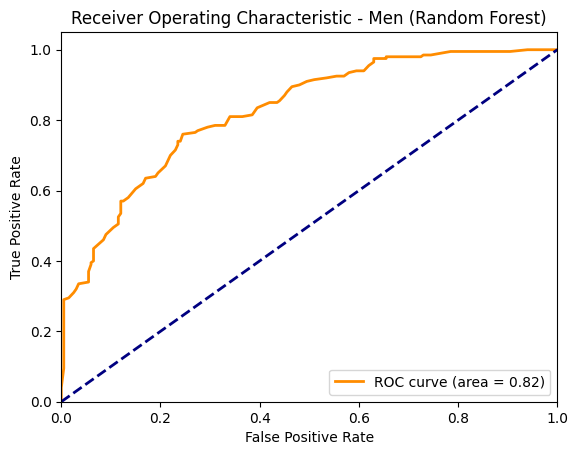

In [23]:
#MEN
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
model_rf_men = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model_rf_men.fit(X_train_scaled, y_train_df)

# Predict on the validation set
predictions_rf_men = model_rf_men.predict(X_val_scaled)

# Evaluate the model
accuracy_rf_men = accuracy_score(y_val_df, predictions_rf_men)
print(f"Men's data Random Forest accuracy: {accuracy_rf_men:.4f}")

# Confusion Matrix
conf_matrix_rf_men = confusion_matrix(y_val_df, predictions_rf_men)
print("Confusion Matrix (Men):\n", conf_matrix_rf_men)

# Classification Report
print("Classification Report (Men):\n", classification_report(y_val_df, predictions_rf_men))

# Cross-Validation
cv_accuracy_rf_men = cross_val_score(model_rf_men, df_data_M_scaled, df_data_M['Outcome'], cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores (Men): {cv_accuracy_rf_men}")
print(f"Mean CV Accuracy (Men): {cv_accuracy_rf_men.mean():.4f}")

# ROC Curve and AUC for Men
y_val_probs_rf_men = model_rf_men.predict_proba(X_val_scaled)[:, 1]
fpr_rf_men, tpr_rf_men, _ = roc_curve(y_val_df, y_val_probs_rf_men)
roc_auc_rf_men = auc(fpr_rf_men, tpr_rf_men)

plt.figure()
plt.plot(fpr_rf_men, tpr_rf_men, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf_men:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Men (Random Forest)')
plt.legend(loc="lower right")
plt.show()

Women's data Random Forest accuracy: 0.7716
Confusion Matrix (Women):
 [[151  46]
 [ 44 153]]
Classification Report (Women):
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       197
           1       0.77      0.78      0.77       197

    accuracy                           0.77       394
   macro avg       0.77      0.77      0.77       394
weighted avg       0.77      0.77      0.77       394

Cross-Validation Accuracy Scores (Women): [0.78549849 0.79456193 0.78851964 0.77945619 0.76969697]
Mean CV Accuracy (Women): 0.7835


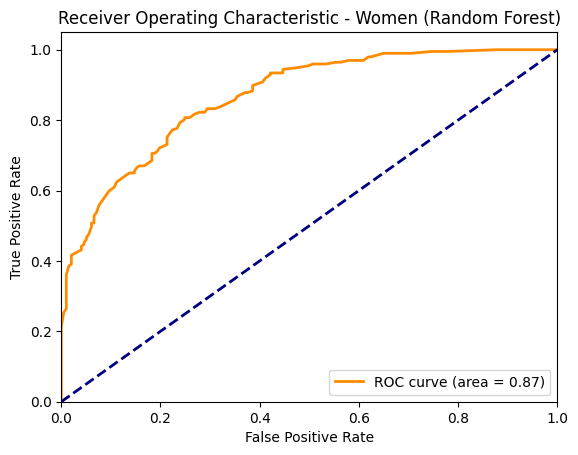

In [24]:
#WOMEN
# Initialize the Random Forest classifier for women's data
model_rf_women = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data for women
model_rf_women.fit(X_train_W_scaled, y_train_Wdf)

# Predict on the validation set for women
predictions_rf_women = model_rf_women.predict(X_val_W_scaled)

# Evaluate the model for women
accuracy_rf_women = accuracy_score(y_val_Wdf, predictions_rf_women)
print(f"Women's data Random Forest accuracy: {accuracy_rf_women:.4f}")

# Confusion Matrix for women
conf_matrix_rf_women = confusion_matrix(y_val_Wdf, predictions_rf_women)
print("Confusion Matrix (Women):\n", conf_matrix_rf_women)

# Classification Report for Women
print("Classification Report (Women):\n", classification_report(y_val_Wdf, predictions_rf_women))

# Cross-Validation for Women
cv_accuracy_rf_women = cross_val_score(model_rf_women, df_data_W_scaled, df_data_W['Outcome'], cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores (Women): {cv_accuracy_rf_women}")
print(f"Mean CV Accuracy (Women): {cv_accuracy_rf_women.mean():.4f}")

# ROC Curve and AUC for Women
y_val_probs_rf_women = model_rf_women.predict_proba(X_val_W_scaled)[:, 1]
fpr_rf_women, tpr_rf_women, _ = roc_curve(y_val_Wdf, y_val_probs_rf_women)
roc_auc_rf_women = auc(fpr_rf_women, tpr_rf_women)

plt.figure()
plt.plot(fpr_rf_women, tpr_rf_women, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf_women:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Women (Random Forest)')
plt.legend(loc="lower right")
plt.show()

Support Vector Machine (SVM):

Men's data SVM accuracy: 0.7100
Confusion Matrix (Men):
 [[142  58]
 [ 58 142]]
Classification Report (Men):
               precision    recall  f1-score   support

           0       0.71      0.71      0.71       200
           1       0.71      0.71      0.71       200

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



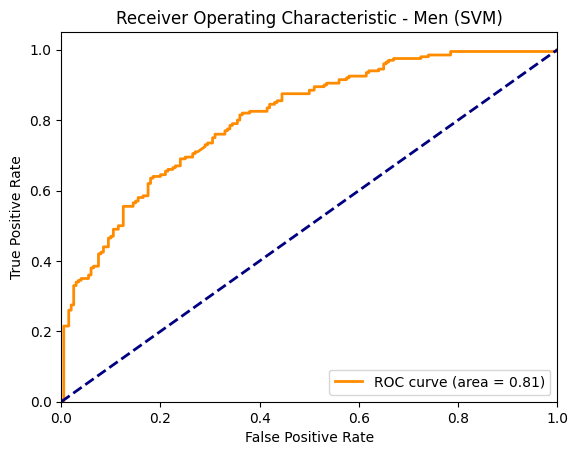

In [25]:
# MEN
from sklearn.svm import SVC
# Fit the SVM model on the training data for men
model_svm_men = SVC(probability=True, random_state=42)
model_svm_men.fit(X_train_scaled, y_train_df)

# Predict on the validation set for men
predictions_svm_men = model_svm_men.predict(X_val_scaled)

# Evaluate the model for men
accuracy_svm_men = accuracy_score(y_val_df, predictions_svm_men)
print(f"Men's data SVM accuracy: {accuracy_svm_men:.4f}")

# Confusion Matrix for men
conf_matrix_svm_men = confusion_matrix(y_val_df, predictions_svm_men)
print("Confusion Matrix (Men):\n", conf_matrix_svm_men)

# Classification Report for men
class_report_svm_men = classification_report(y_val_df, predictions_svm_men)
print("Classification Report (Men):\n", class_report_svm_men)

# ROC Curve and AUC for Men
y_val_probs_svm_men = model_svm_men.predict_proba(X_val_scaled)[:, 1]
fpr_svm_men, tpr_svm_men, _ = roc_curve(y_val_df, y_val_probs_svm_men)
roc_auc_svm_men = auc(fpr_svm_men, tpr_svm_men)

plt.figure()
plt.plot(fpr_svm_men, tpr_svm_men, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm_men:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Men (SVM)')
plt.legend(loc="lower right")
plt.show()

Women's data SVM accuracy: 0.8122
Confusion Matrix (Women):
 [[160  37]
 [ 37 160]]
Classification Report (Women):
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       197
           1       0.81      0.81      0.81       197

    accuracy                           0.81       394
   macro avg       0.81      0.81      0.81       394
weighted avg       0.81      0.81      0.81       394



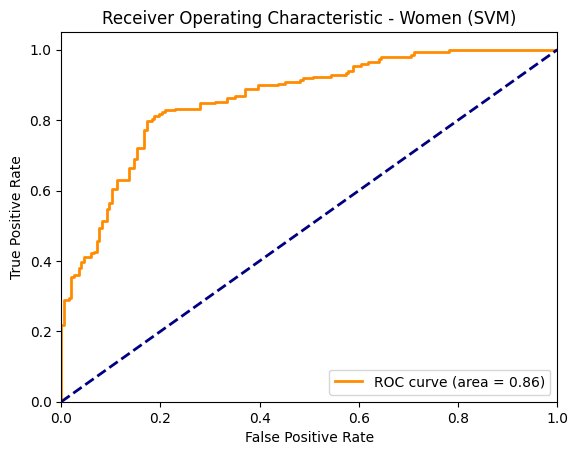

In [26]:
# WOMEN
# Fit the SVM model on the training data for women
model_svm_women = SVC(probability=True, random_state=42)
model_svm_women.fit(X_train_W_scaled, y_train_Wdf)

# Predict on the validation set for women
predictions_svm_women = model_svm_women.predict(X_val_W_scaled)

# Evaluate the model for women
accuracy_svm_women = accuracy_score(y_val_Wdf, predictions_svm_women)
print(f"Women's data SVM accuracy: {accuracy_svm_women:.4f}")

# Confusion Matrix for women
conf_matrix_svm_women = confusion_matrix(y_val_Wdf, predictions_svm_women)
print("Confusion Matrix (Women):\n", conf_matrix_svm_women)

# Classification Report for women
class_report_svm_women = classification_report(y_val_Wdf, predictions_svm_women)
print("Classification Report (Women):\n", class_report_svm_women)

# ROC Curve and AUC for Women
y_val_probs_svm_women = model_svm_women.predict_proba(X_val_W_scaled)[:, 1]
fpr_svm_women, tpr_svm_women, _ = roc_curve(y_val_Wdf, y_val_probs_svm_women)
roc_auc_svm_women = auc(fpr_svm_women, tpr_svm_women)

plt.figure()
plt.plot(fpr_svm_women, tpr_svm_women, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm_women:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Women (SVM)')
plt.legend(loc="lower right")
plt.show()

Draw three models in one graph:

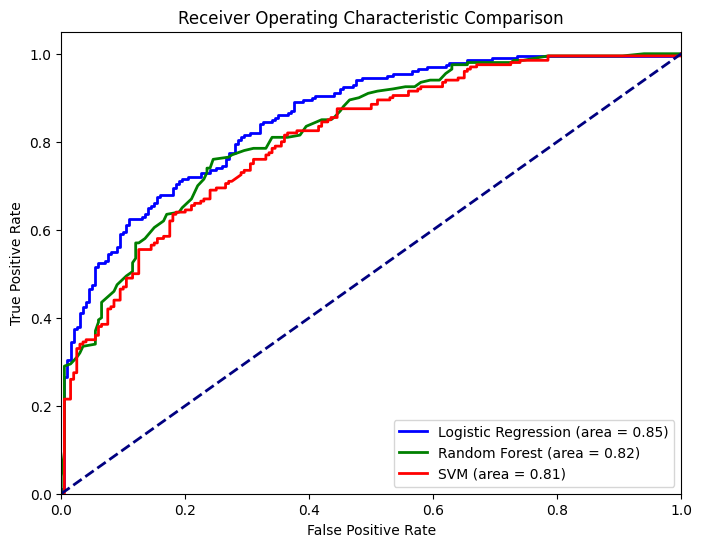

In [27]:
# Compute ROC curve and ROC area for each model
fpr_log, tpr_log, _ = roc_curve(y_val_df, y_val_probs)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_val_df, y_val_probs_rf_men)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_svm, tpr_svm, _ = roc_curve(y_val_df, y_val_probs_svm_men)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (area = {roc_auc_log:.2f})', color='blue', linestyle='-', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})', color='green', linestyle='-', linewidth=2)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (area = {roc_auc_svm:.2f})', color='red', linestyle='-', linewidth=2)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Comparison')
plt.legend(loc="lower right")
plt.show()

RNN

In [28]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
#MEN
# Split the dataset into features and target variable
X = df_data_M[features_M].values
y = df_data_M[Target_M].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and validation sets
# Note: Ensure you have a train-validation split. Here's an example using 80% of data for training
split_index = int(0.8 * len(X_scaled))
X_train, X_val = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_3D = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_3D = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Now proceed with defining and training your LSTM model as before
model_M = Sequential()
model_M.add(LSTM(units=50, activation='sigmoid', input_shape=(X_train_3D.shape[1], X_train_3D.shape[2])))
model_M.add(Dense(units=1))
model_M.compile(optimizer='adam', loss='mean_squared_error')
model_M.fit(X_train_3D, y_train, epochs=10, batch_size=16, validation_data=(X_val_3D, y_val))


2024-04-08 06:42:07.999379: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 06:42:07.999516: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 06:42:08.169881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10
87/87 [==============================] - 2s 6ms/step - loss: 0.4312 - val_loss: 0.2041
Epoch 2/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1665 - val_loss: 0.1798
Epoch 3/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1603 - val_loss: 0.1701
Epoch 4/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1575 - val_loss: 0.1647
Epoch 5/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1557 - val_loss: 0.1645
Epoch 6/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1551 - val_loss: 0.1640
Epoch 7/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1550 - val_loss: 0.1643
Epoch 8/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1546 - val_loss: 0.1640
Epoch 9/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1542 - val_loss: 0.1633
Epoch 10/10
87/87 [==============================] - 0s 3ms/step - loss: 0.1541 - val_loss: 0.1644


In [30]:
# WOMEN
# Split the dataset into features and target variable
X_W = df_data_W[features_W].values
y_W = df_data_W[Target_W].values

# Standardize the features
scaler_W = StandardScaler()
X_scaled_W = scaler_W.fit_transform(X_W)

# Split the standardized data into training and validation sets
# Note: Ensure you have a train-validation split. Here's an example using 80% of data for training
split_index_W = int(0.8 * len(X_scaled_W))
X_train_W, X_val_W = X_scaled_W[:split_index_W], X_scaled_W[split_index_W:]
y_train_W, y_val_W = y_W[:split_index_W], y_W[split_index_W:]

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_W_3D = X_train_W.reshape((X_train_W.shape[0], 1, X_train_W.shape[1]))
X_val_W_3D = X_val_W.reshape((X_val_W.shape[0], 1, X_val_W.shape[1]))

# Create an RNN model for women
model_W = Sequential()
model_W.add(LSTM(units=50, activation='sigmoid', input_shape=(X_train_W_3D.shape[1], X_train_W_3D.shape[2])))
model_W.add(Dense(units=1))
model_W.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for women
history_W = model_W.fit(X_train_W_3D, y_train_W, epochs=10, batch_size=16, validation_data=(X_val_W_3D, y_val_W))


Epoch 1/10
83/83 [==============================] - 2s 6ms/step - loss: 0.3044 - val_loss: 0.1712
Epoch 2/10
83/83 [==============================] - 0s 3ms/step - loss: 0.1345 - val_loss: 0.1650
Epoch 3/10
83/83 [==============================] - 0s 3ms/step - loss: 0.1315 - val_loss: 0.1613
Epoch 4/10
83/83 [==============================] - 0s 3ms/step - loss: 0.1296 - val_loss: 0.1587
Epoch 5/10
83/83 [==============================] - 0s 3ms/step - loss: 0.1293 - val_loss: 0.1577
Epoch 6/10
83/83 [==============================] - 0s 3ms/step - loss: 0.1278 - val_loss: 0.1582
Epoch 7/10
83/83 [==============================] - 0s 3ms/step - loss: 0.1275 - val_loss: 0.1580
Epoch 8/10
83/83 [==============================] - 0s 3ms/step - loss: 0.1272 - val_loss: 0.1565
Epoch 9/10
83/83 [==============================] - 0s 3ms/step - loss: 0.1272 - val_loss: 0.1569
Epoch 10/10
83/83 [==============================] - 0s 3ms/step - loss: 0.1269 - val_loss: 0.1560
